In [1]:
library(car)
library(MASS)

Loading required package: carData


load bodyfat data

In [2]:
fat = read.csv("BodyFat.csv", header = T)

use the relationship between density and bodyfat to detect outliers

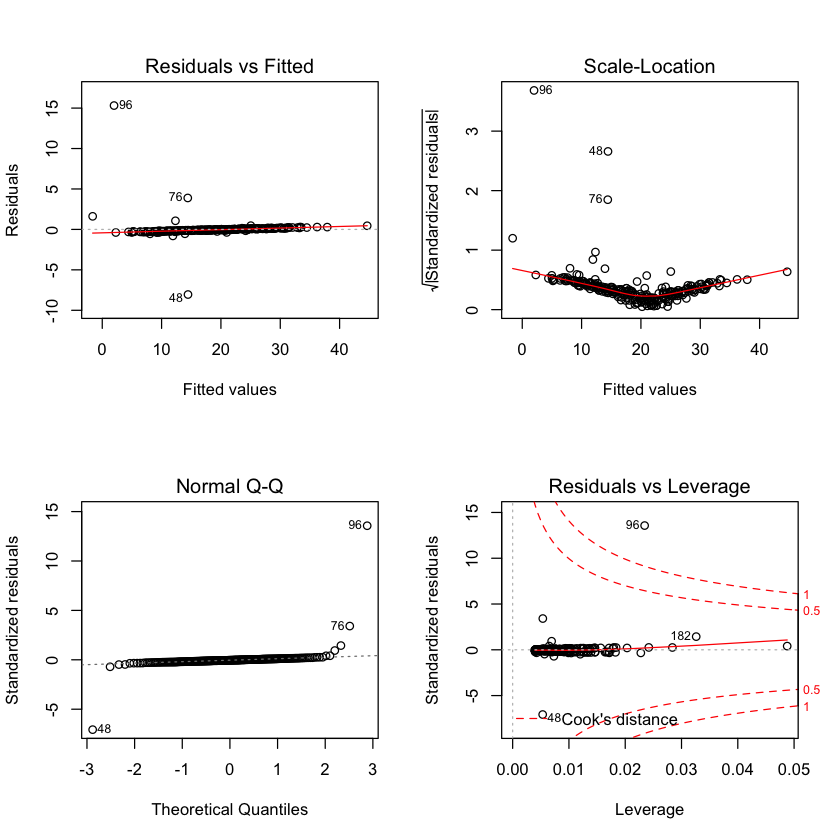

In [3]:
den.inverse = 1/fat$DENSITY
test.m1 = lm(fat$BODYFAT~den.inverse)
# summary(test.m1)
par(mfcol=c(2,2))
plot(test.m1)

From the result above, we think records with ID equals to 48, 76, 96 are outliers.

Then we fit the full model without the density factor and do outlier test

In [4]:
fat.rm = fat[-c(76,96,48),]

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

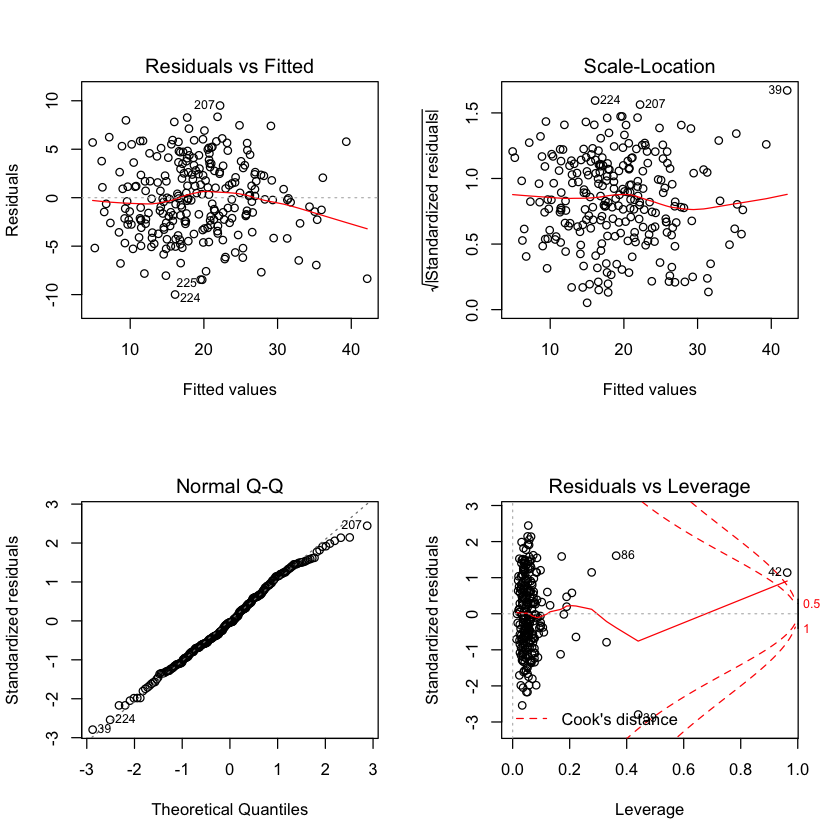

In [5]:
# fit the full model
fat.rm$DENSITY = NULL
test.m2 = lm(BODYFAT~.,fat.rm)
# summary(test.m2)
par(mfcol=c(2,2))
plot(test.m2)

Denote the parameters in following outlier detection:

`p`: number of factors in regression model

`n`: number of observations in regression model

In [6]:
p = 15
n = nrow(fat.rm)
index = 1:n

Detect the influential points in `fat.rm` data by selecting high leverage observations. According to the printed result, observations with ID equals to 31, 39, 42, 86, 175 are high influential points, with great probability to be treated as outliers.

[1]  31  39  42  86 175

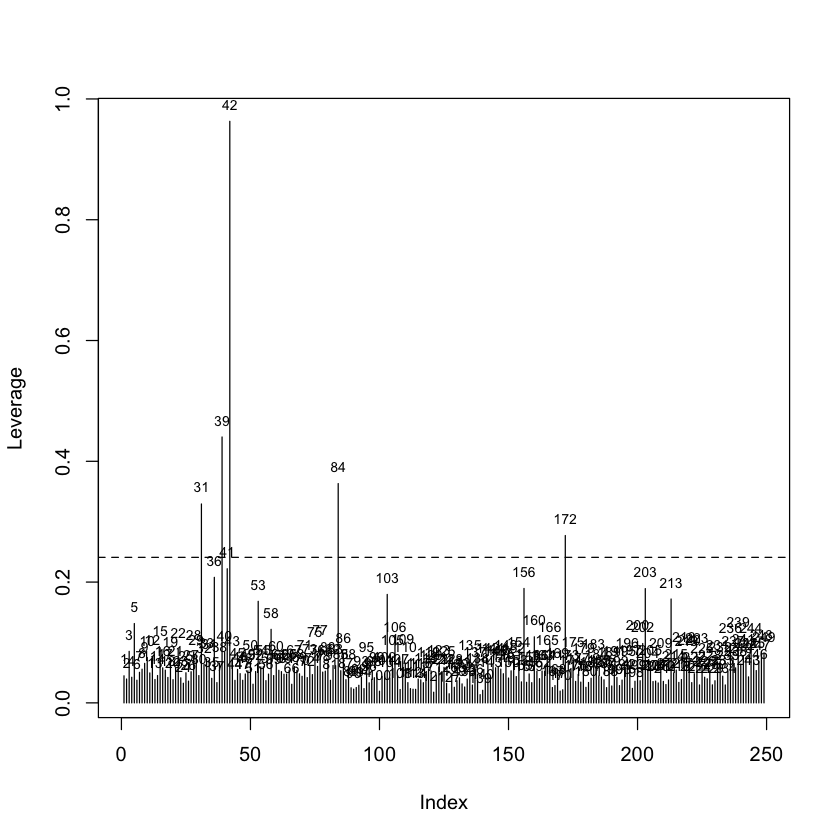

In [7]:
model.hats = hatvalues(test.m2)
par(mfcol=c(1,1))
plot(model.hats, type = "h", ylab = "Leverage") 
text(model.hats, labels = 1:n, cex = 0.7, pos=3) 
abline(h=4*15/n, lty = 2) # threshold too samll
fat.rm$IDNO[c(model.hats > 4*p/n)]

Use studentized residuals to detect the outliers, the result does not show any outliers in this data set.

integer(0)

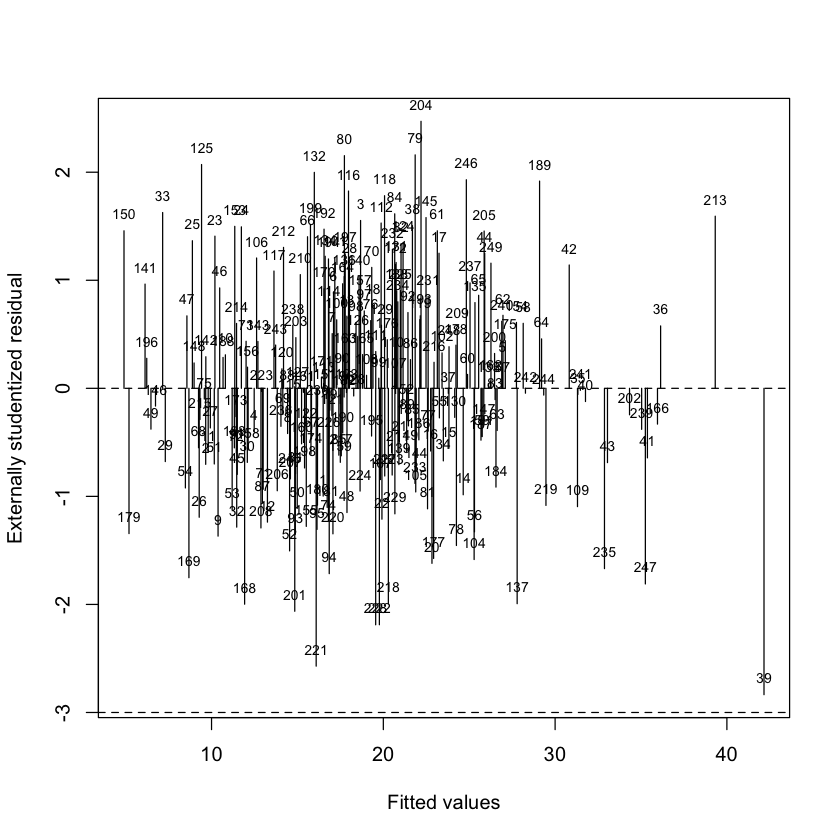

In [8]:
plot(test.m2$fitted, studres(test.m2), type = "h", xlab="Fitted values",
     ylab="Externally studentized residual")
abline(h=c(0,-3,3), lty=2)
text(test.m2$fitted, studres(test.m2), labels=1:n, cex=0.7, pos=3)
fat.rm$IDNO[c(abs(studres(test.m2))>3)]

Use `outlierTest` function to detect the outliers and the result shows that item with ID=39 is an outlier.

In [9]:
outlierTest(test.m2)

No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferonni p
39 -2.835148          0.0049847           NA

Perform the cook's Distance to detect the outliers and treat the observations with following IDs may be suspected.

[1]  31  39  42  82  86 128 175 207 216 221 231

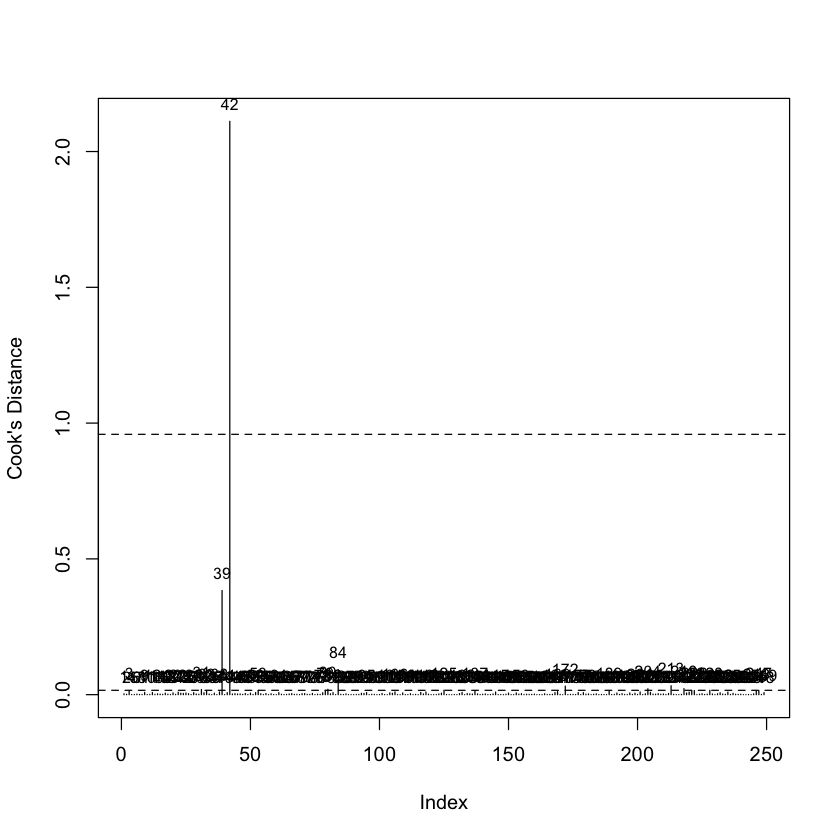

In [10]:
model.cooksD = cooks.distance(test.m2)
plot(model.cooksD, type = "h", ylab="Cook's Distance") 
text(model.cooksD, labels = 1:n, cex = 0.8, pos = 3)
abline(h=qf(0.50,p,n-p), lty=2) #check whether D_i > f_0.5,p,n-p
abline(h=4/n, lty=2)
fat.rm$IDNO[c(model.cooksD>4/n)]

Consider several outlier detectation methods above and evaluate the results obtained, we draw a conclusion that following points with which IDNO feature should be deleted in the future calculation:

ID = 31,39,42,48,76,86,96,175

Delete the outliers and fit the new regression model

In [11]:
fat.rm = fat.rm[-c(31,39,42,84,172),]
test.m3 = lm(BODYFAT~.,fat.rm)
summary(test.m3)


Call:
lm(formula = BODYFAT ~ ., data = fat.rm)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3311 -2.7079 -0.0899  2.8583  9.3680 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28.251518  37.436548  -0.755   0.4512    
IDNO         -0.002975   0.003785  -0.786   0.4327    
AGE           0.060571   0.031797   1.905   0.0581 .  
WEIGHT       -0.100997   0.104674  -0.965   0.3356    
HEIGHT        0.295055   0.513277   0.575   0.5660    
ADIPOSITY     0.716809   0.732201   0.979   0.3286    
NECK         -0.365369   0.222621  -1.641   0.1021    
CHEST        -0.124073   0.104274  -1.190   0.2353    
ABDOMEN       0.845236   0.088191   9.584   <2e-16 ***
HIP          -0.208420   0.139921  -1.490   0.1377    
THIGH         0.174340   0.137863   1.265   0.2073    
KNEE         -0.013404   0.235022  -0.057   0.9546    
ANKLE        -0.011340   0.347884  -0.033   0.9740    
BICEPS        0.124995   0.162814   0.768   0.4435    
FOREARM       0.31

save the clean data as `clean_fat.csv`

In [12]:
write.csv(fat.rm, "clean_fat.csv")